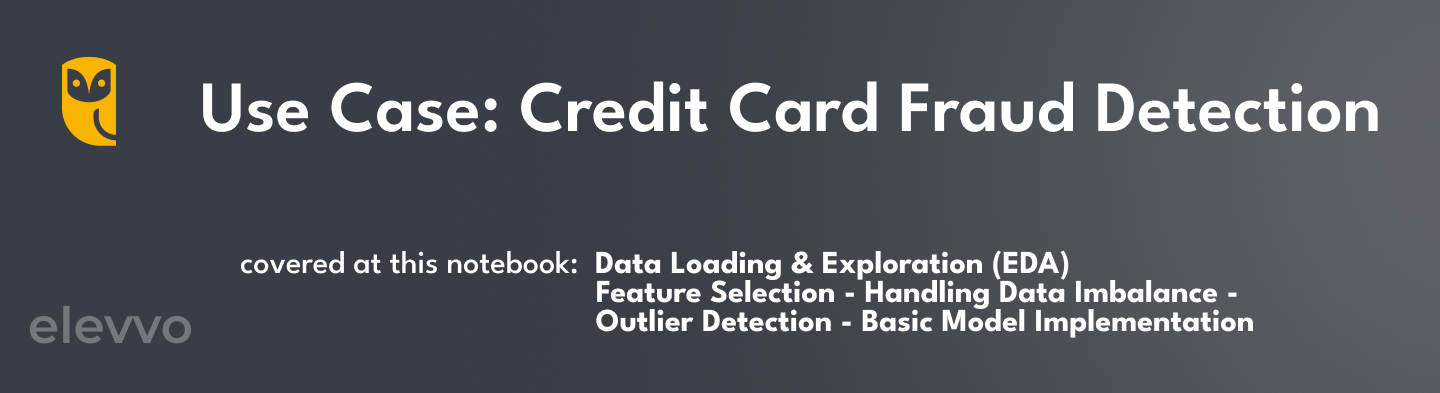

#Some Info About the Dataset
1 - **Dataset:** Transactions made by European cardholders in September 2013.

2 - **Duration**: Two days, with 492 frauds out of 284,807 transactions.

3 - **Class Imbalance**: Fraudulent transactions (positive class) account for 0.172% of all transactions.


4 - **Features**:
Numerical input variables resulting from PCA transformation.

*Target*: 'Class': Response variable, 1 for fraud, 0 otherwise.

📌 Principal Component Analysis (PCA) is a statistical technique used for ***dimensionality reduction***. It transforms a large set of variables into a smaller one that still contains most of the information in the large set.


#Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#loading the dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Track/Fraud Detection Use Case/creditcard.csv')

In [4]:
#checking duplicates
df.duplicated().sum()

np.int64(1081)

In [5]:
#first 5 rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#summary about dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(f'Shape of the dataset: {df.shape}')  #number of rows and columns
print(f'Class Categories: {df.Class.unique()}')  #our categories
print(f'number of records of 0: {(df.Class == 0).sum()}')  #number of records with class 0
print(f'number of records of 1: {(df.Class==1).sum()}')  #number of records with class 1

Shape of the dataset: (284807, 31)
Class Categories: [0 1]
number of records of 0: 284315
number of records of 1: 492


<Axes: xlabel='Class', ylabel='count'>

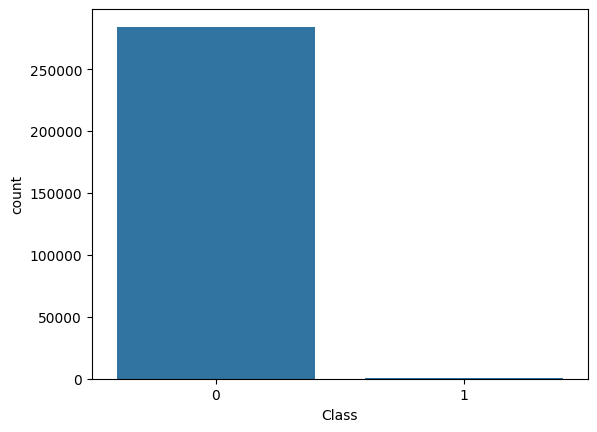

In [ ]:
sns.countplot(x='Class', data=df)  #displays the counts of observations in each categorical bin using bars

#Features Selection

In [ ]:
x = df.corr()['Class'][:30]  #calculates correlation between columns and target
x

,Class
Time,-0.012323
V1,-0.101347
V2,0.091289
V3,-0.192961
V4,0.133447
V5,-0.094974
V6,-0.043643
V7,-0.187257
V8,0.019875
V9,-0.097733


<Axes: title={'center': 'Correlation between features and Class'}>

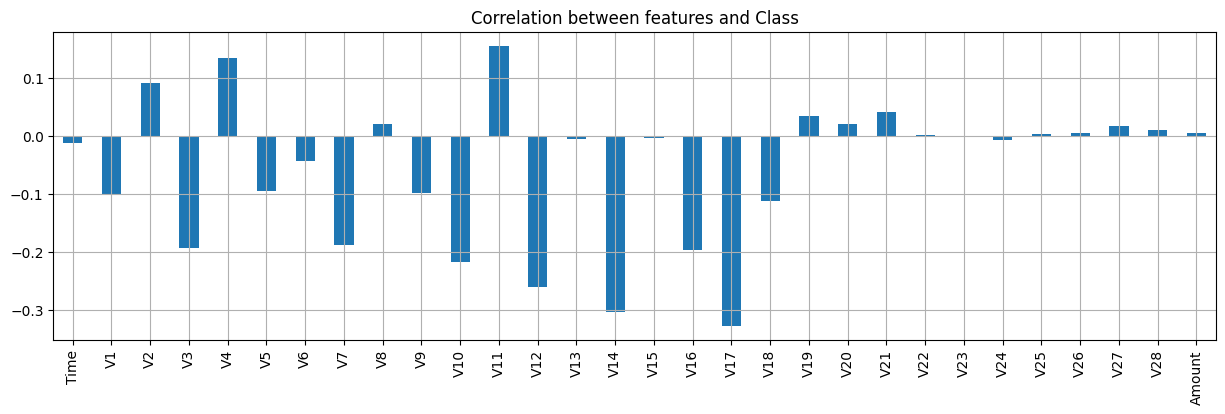

In [ ]:
x.plot.bar(figsize=(15, 4), title="Correlation between features and Class", grid=True)

📌Some features exhibit a negligible correlation with the target variable and will be removed in the subsequent sections. First, we'll examine the intercorrelation among variables.

<Axes: >

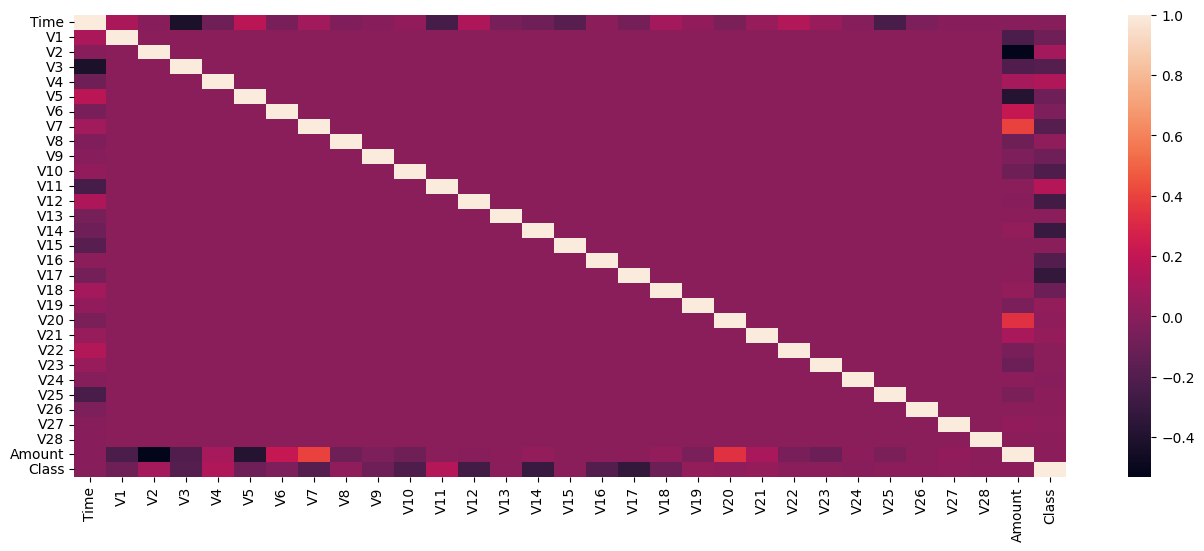

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df.corr())

In [ ]:
y = df.corr()['Class']

df2 = df.copy()

for i in df.columns:
  if abs(y[i]) < 0.13:
    df2.drop(columns=[i], inplace=True)  #removing less correlated features

In [ ]:
df2.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0
1,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,0
2,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,0
3,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,0
4,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,0


<Axes: >

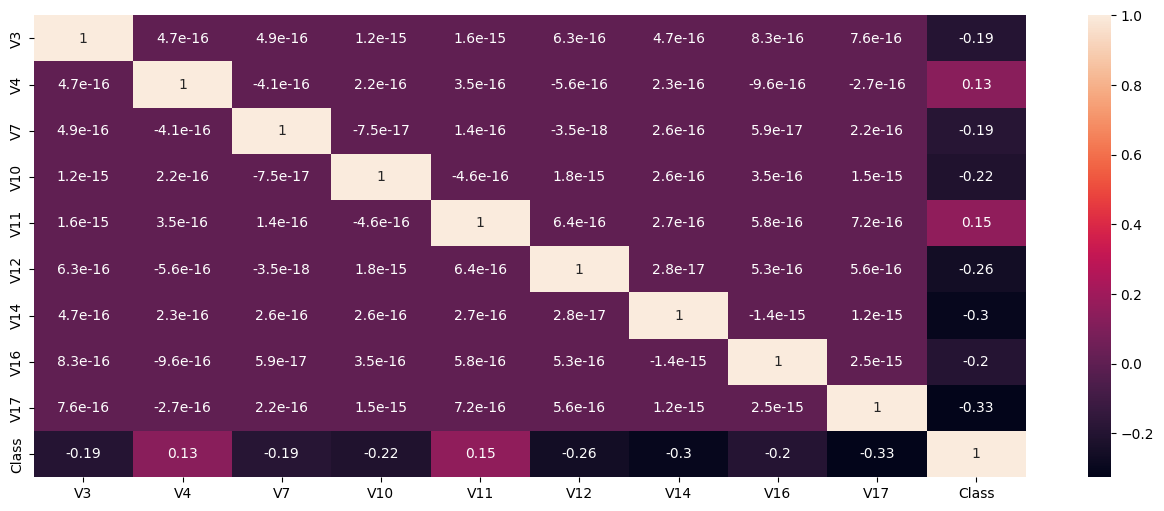

In [ ]:
plt.figure(figsize=(16,6))
sns.heatmap(df2.corr(), annot=True)

<Axes: title={'center': 'Top Correlated Features With Target Variable'}>

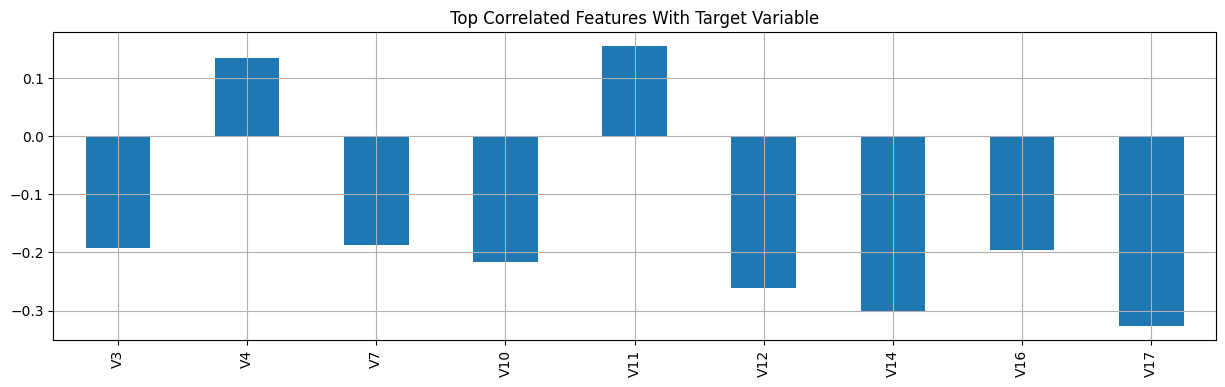

In [ ]:
x = df2.corr()['Class'][:9]

x.plot.bar(figsize=(15,4), title="Top Correlated Features With Target Variable", grid=True)

#Handling Data Imbalance

📌 This dataset consists of:

Number of records with the class value 0: 284,315
Number of records with the class value 1: 492

📌 Using this dataset as it is would be a fatal mistake due to its severe class imbalance. Here's why:

Using the data as it is:

The overwhelming majority of records belong to the non-fraudulent class (class 0), making up over 99% of the dataset.
Models trained on imbalanced data may prioritize accuracy on the majority class while neglecting the minority class (fraudulent transactions). This can result in poor performance in detecting fraud.

📌 we will solve this problem using Downsampling

📌 Downsampling involves randomly reducing the number of samples in the majority class to balance it with the minority class

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = df2.drop('Class', axis=1)
y = df2['Class']

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

downsampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['Class'])], axis=1)

In [ ]:
downsampled_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
138028,-0.666593,0.716564,0.388881,-0.597739,-0.325347,-0.216435,-1.054631,0.601226,0.631117,0
63099,0.904547,0.694584,0.495236,0.170547,0.821998,0.468322,0.573006,-0.011633,-0.504570,0
73411,1.122074,-1.308725,-0.701304,2.051312,0.575866,-0.594037,-0.338340,-0.756390,0.535141,0
164247,-0.987421,-0.029567,0.775644,-1.238598,-0.841133,-0.586472,-0.436671,0.266437,0.703234,0
148999,0.269272,3.866438,-0.721945,1.166335,1.297531,-1.920966,1.323225,1.317655,-0.441076,0


In [ ]:
downsampled_df.shape

(984, 10)

#Is There Outliers?

<Axes: xlabel='Class', ylabel='count'>

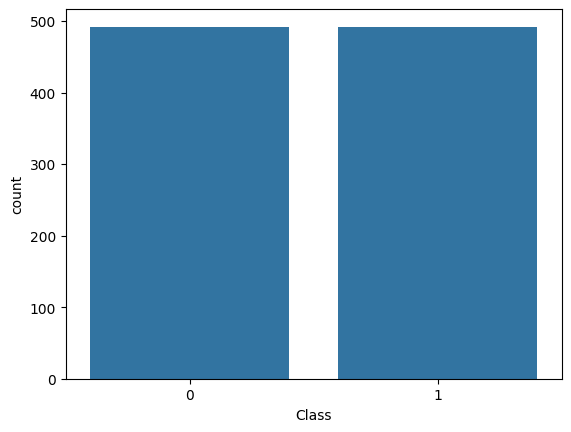

In [ ]:
sns.countplot(x='Class', data=downsampled_df)

📌 now that our dataset is balanced, we can move on to the next section: handling outliers. How should we approach outliers? Should we simply delete them? Let's explore.

<Axes: xlabel='V11', ylabel='V17'>

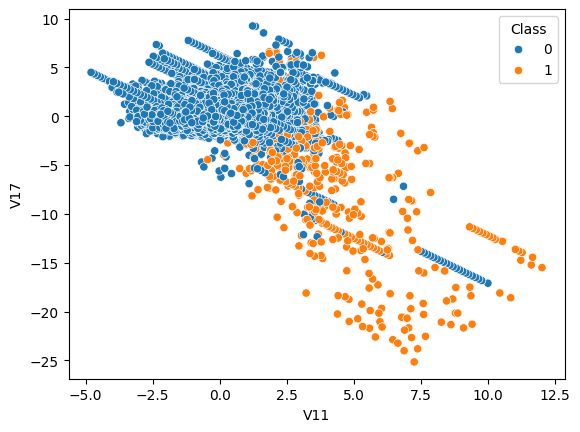

In [ ]:
sns.scatterplot(x='V11', y='V17', hue='Class', data=df2)

📌 Outliers are data points that significantly deviate from the average of a variable. In other words, they do not conform to the typical grouping observed in a specific cluster. Did you notice something interesting in this plot? The blue dots represent normal transactions, tightly clustered with very few outliers. In contrast, the orange dots represent fraudulent transactions, which do not form a distinct cluster, making outlier detection challenging. Is this pattern consistent across all variables or just in this example? Let's investigate further.

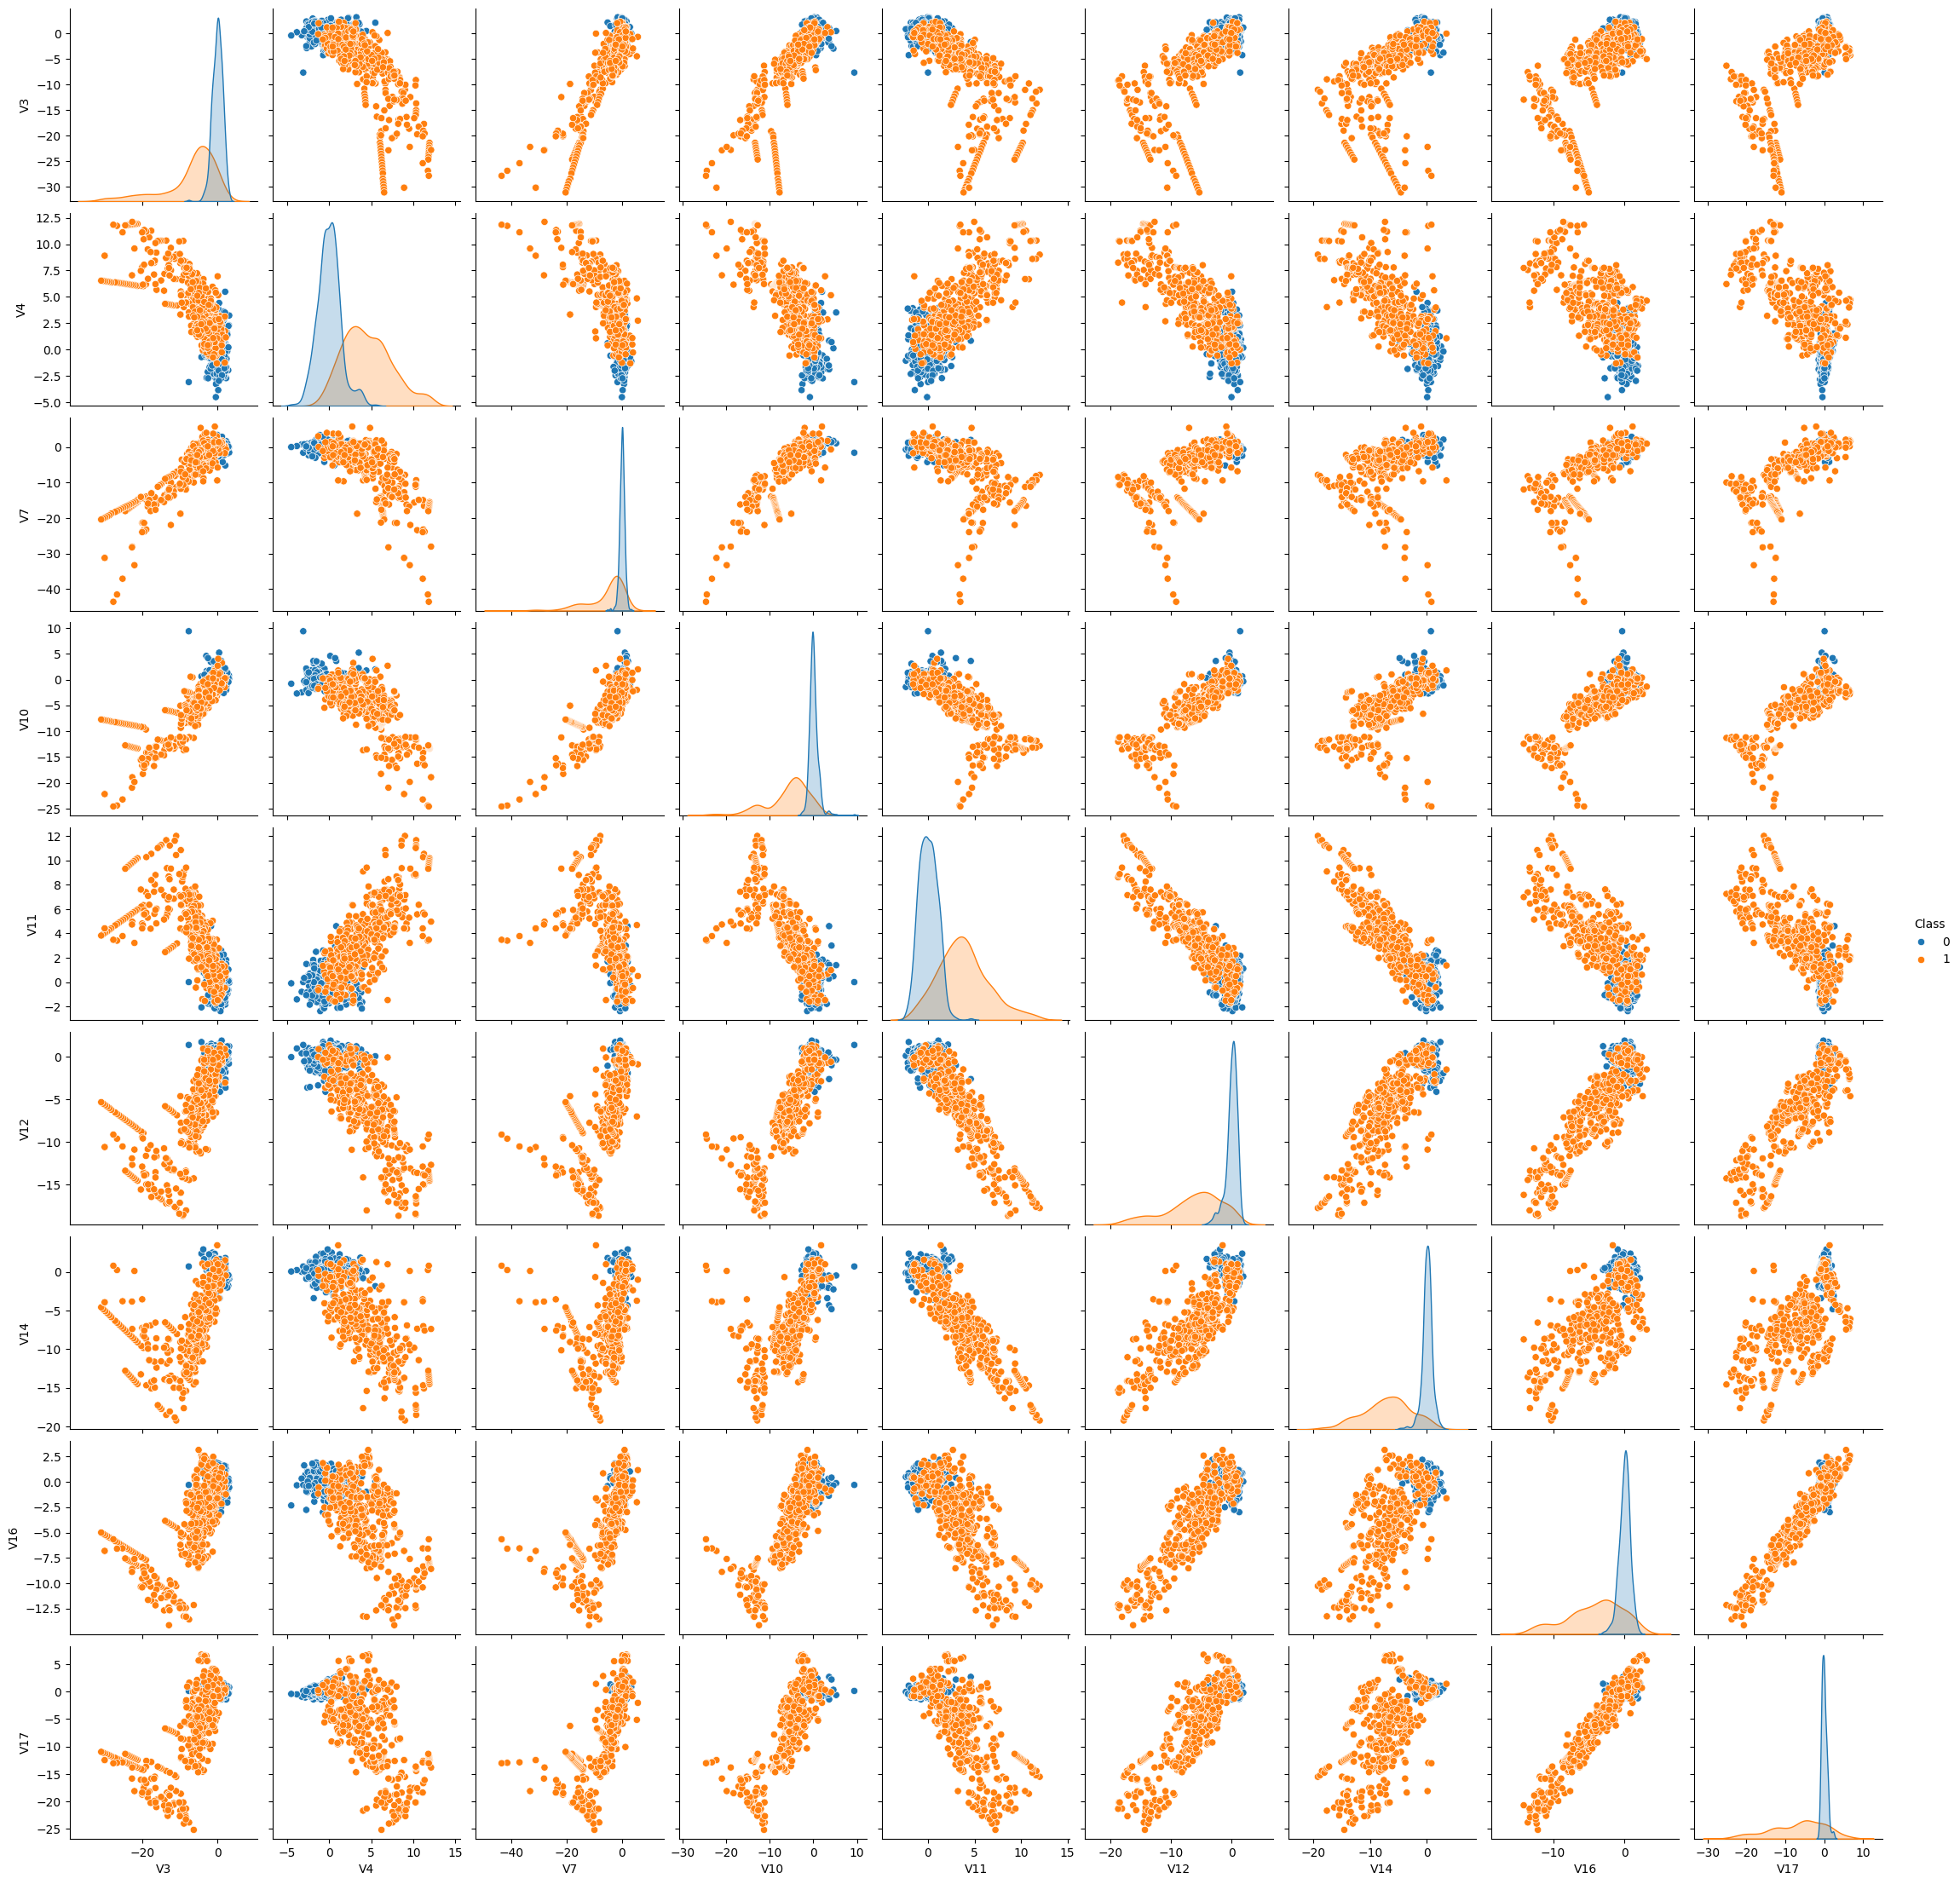

In [ ]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(downsampled_df, hue='Class')

📌 As you may have observed in this pairplot, normal transactions form a distinct cluster across all variables, whereas fraudulent transactions do not exhibit a specific cluster. This makes outlier detection extremely challenging. Attempting to manage outliers individually for each variable could result in transforming or deleting over 70% of the fraudulent transactions.

#Removing Outliers From Class 0 Using Z-score Method

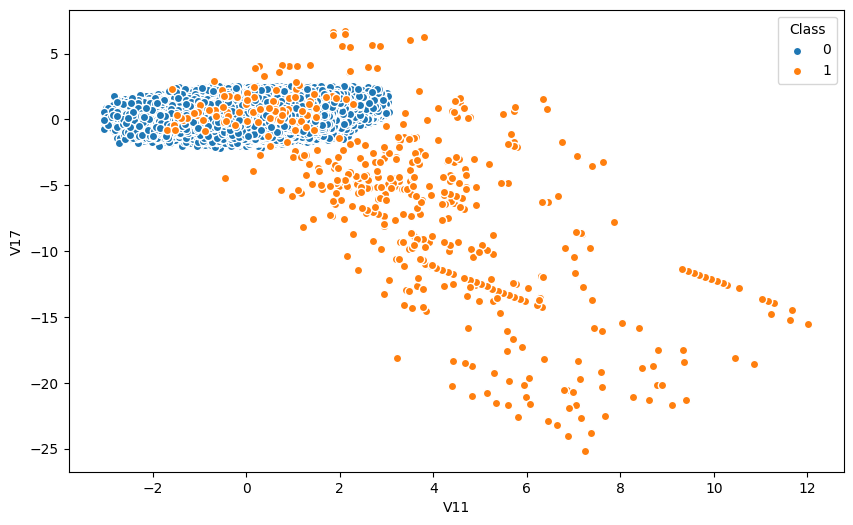

In [ ]:
from scipy import stats

# Select only numerical columns for Z-score calculation
numerical_columns = df.select_dtypes(include=[np.number]).columns

# Calculate Z-scores for all numerical columns
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Define a threshold for the Z-score
threshold = 3

# Filter out the outliers
filtered_entries = (z_scores < threshold).all(axis=1)
class_0_cleaned = df[df['Class'] == 0][filtered_entries]

# Combine with the other class points
df_cleaned = pd.concat([class_0_cleaned, df[df['Class'] == 1]])

# Plot the cleaned data
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned[df_cleaned['Class'] == 0]['V11'], df_cleaned[df_cleaned['Class'] == 0]['V17'], label='0', edgecolor='White')
plt.scatter(df_cleaned[df_cleaned['Class'] == 1]['V11'], df_cleaned[df_cleaned['Class'] == 1]['V17'], label='1', edgecolor='White')
plt.xlabel('V11')
plt.ylabel('V17')
plt.legend(title='Class')
plt.show()

#Proper Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#original imbalanced data
X = df2.drop(columns='Class')
y = df2['Class']

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#downsampling only the training data to ensure there is no data leakage
train_data = X_train_orig.copy()
train_data['Class'] = y_train_orig

#separate the majority and minority class in the training data
majority_class = train_data[train_data['Class'] == 0]
minority_class = train_data[train_data['Class'] == 1]

#Downsample the majority class
majority_downsampled = resample(majority_class,
                                replace=False,
                                n_samples=len(minority_class),
                                random_state=42)

#combine the downsampled majority class with the minority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

X_train_downsampled = downsampled_data.drop(columns='Class')
y_train_downsampled = downsampled_data['Class']

what did we use in splitting the data?

📌 **Use a stratified split:** A stratified split ensures that this imbalance is maintained in both the training and test sets.

📌 **Downsample the training data:** As previously explained, this is important to avoid bias and ensure that the model learns effectively

📌 **Avoid data leakage:** Ensure that there is no overlap between the final training and test datasets to prevent information from the test set influencing the training process.


# Implementing Basic ML Models

📌 that we have cleaned and processed our data, let's implement basic machine learning models.

## Logistic Regression
A simple classification model useful for binary problems.

## Decision Tree
A model that learns decision rules from the data.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are already defined from preprocessing steps
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9990871107053826
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.57      0.68        98

    accuracy                           1.00     56962
   macro avg       0.92      0.79      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9992802219023208
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.68      0.77        98

    accuracy                           1.00     56962
   macro avg       0.93      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962

